# Table of contents

[1. Loading Libraries](#loading)

[2. Gathering Data](#gathering)
  * [A. Importing Enhanced Twitter Archive](#T-archive)
   
  * [B. Downloading the Tweet Image Predictions](#predictions)
   
  * [C. Getting Tweet Data From Twitter API](#T-api)
  
[3. Assessing Data](#assessing)
  * [A. Assesing Enhanced Twitter Archive Data](#assess-T-archive)

  * [B. Assesing the Tweet Image Predictions](#assess-predictions)
  
  * [C. Asessing Tweet Data From Twitter API](#assessT-api)

[4. Cleaning Data](#cleaning)
  * [A. Creating Dataframe Copies](#copies)

  * [B. Cleaning Tidiness Issues](#tidiness)
  
  * [C. Cleaning Quality Issues](#quality)
  
[5. Storing Data](#storing)

[6. Data Analysis and Visualization](#analysis)

<a id='loading'></a>
## 1. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

<a id='gathering'></a>
## 2. Gathering Data

<a id='T-archive'></a>

### A. Importing Enhanced Twitter Archive

In [2]:
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

<a id='predictions'></a>

### B. Downloading the  Tweet Image Predictions

In [3]:

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

<a id='T-api'></a>
### C. Getting Tweet Data From Twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
# import json (was imported above)
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# converting the txt file to a data list where each element (line) contains one piece of tweet info
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [5]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [6]:
# Creating a dataframe from the previous list that contains the id, retweet count, and favorite count
tweet_data = pd.DataFrame(df_list, columns = ['id', 
                                            'retweet_count', 
                                            'favorite_count'])

In [7]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
# Changing the name of the id column to tweet_id
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
# Saving the dataframe to a csv file for future use (without the index column so it will not appear as unnamed column in the file)
tweet_data.to_csv('tweet_data.csv', index=False)

In [10]:
# Checking the file was saved correctly 
x = pd.read_csv('tweet_data.csv')
x.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assessing'></a>
## 3. Assessing Data

<a id='assess-T-archive'></a>

### A. Assesing Enhanced Twitter Archive Data

In [11]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1196,717047459982213120,NaN,NaN,2016-04-04 17:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio (pronounced Baxter). He's a Ben...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,None,None,None,None
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
1216,714982300363173890,NaN,NaN,2016-03-30 01:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calbert. He forgot to clear his Google...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714982300...,9,10,Calbert,None,None,None,None
911,757597904299253760,NaN,NaN,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @jon_hill987: @dog_rates There is a cunning...,7.575971e+17,2.804798e+08,2016-07-25 15:23:28 +0000,https://twitter.com/jon_hill987/status/7575971...,11,10,None,None,None,pupper,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a Byzantine Rigatoni. Very aerodyn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677187300...,9,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [13]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
t_archive[t_archive.rating_numerator <10].count()[0]

440

In [16]:
# Checking which IDs have numerators with less than 0
t_archive[t_archive.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [17]:
# Checking rating_numerator of tweet_id 666337882303524864
t_archive.loc[(t_archive.tweet_id == 666337882303524864), 'rating_numerator']

2333    9
Name: rating_numerator, dtype: int64

In [18]:
# Checking textof tweet_id 666337882303524864 using row number
t_archive.loc[2333, 'text']

'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL'

In [19]:
t_archive.rating_denominator.describe()
#Some denominators have a 0 value

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
# Checking which IDs have denominators with a 0 value
t_archive[t_archive.rating_denominator == 0].tweet_id
# Only one does

313    835246439529840640
Name: tweet_id, dtype: int64

In [21]:
# Displaying ID that has a denominator with 0 value
t_archive.loc[[313]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [22]:
# A better way for Displaying ID that has a denominator with 0 value to avoid horizontal scrolling
t_archive.loc[313,:]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                               8.35246e+17
in_reply_to_user_id                                                 2.62596e+07
timestamp                                             2017-02-24 21:54:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                            960
rating_denominator                                                            0
name                                    

In [23]:
# Displaying text for ID that has a denominator with 0 value to avoid horizontal scrolling
t_archive.loc[313,'text']
# It appears some one was trying to correct @jonnysun

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [24]:
t_archive[t_archive.rating_denominator != 10].count()[0]

23

In [25]:
t_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Buddy          7
Toby           7
an             7
Daisy          7
Rusty          6
Jax            6
Milo           6
Stanley        6
Scout          6
Bella          6
Oscar          6
Jack           6
Leo            6
Koda           6
Dave           6
George         5
            ... 
Bowie          1
Shooter        1
Kirk           1
Eleanor        1
Hector         1
Arlen          1
Huxley         1
such           1
Jeb            1
Brownie        1
Charleson      1
Dobby          1
Flash          1
Dook           1
Scott          1
Clarq          1
Beebop         1
Chuq           1
Roscoe         1
Swagger        1
Ronduh         1
Severus        1
Tupawc         1
Birf           1
Ike            1
Patch          1
Vinnie         1
Arlo          

<a id='assess-predictions'></a>

### B. Assesing the Tweet Image Predictions

In [26]:
i_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
i_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
i_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True
199,669661792646373376,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True
972,706644897839910912,https://pbs.twimg.com/ext_tw_video_thumb/70664...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True


In [28]:
# Just curious how this photo was identified as a bathtub
i_predictions.loc[1312,'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [29]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')
# Now I understand :)

In [30]:
i_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id='assessT-api'></a>

### C. Asessing Tweet Data From Twitter API

In [31]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [32]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
2234,668154635664932864,336,522
2120,670403879788544000,173,460
1099,735635087207878657,2659,6776
1216,714957620017307648,1595,4503
1337,704871453724954624,1245,4585
1861,675372240448454658,563,1838
1215,714962719905021952,4816,8028
2333,666287406224695296,71,152
502,813066809284972545,2276,8865
915,756939218950160384,2295,7342


In [33]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Tidiness
#### T1.  Dog stage data is separated into 4 columns.
#### T2. All data is related but divided into 3 separate dataframes.

## Quality
### A) Enhanced Twitter Archive
#### Q1. There are 181 retweetes as indicated by retweeted_status_id.
#### Q2. Some dog names are invalid (None, a, an, & the instead of name).
#### Q3.  Invalid tweet_id data type (integer instead of string).
#### Q4.  Invalid timestamp data type (string not datetime).

#### Q5. 440 rating numerators less than 10 (ex: 1998).
#### Q6. Row 313 has 0 denominator.
#### Q7. 23 rating denominators not equal 10.

### B) Tweet Image Predictions
#### Q1. Missing photos for some IDs (2075 rows instead of 2356).
#### Q2. Underscores are used in multi-word names in columns p1, p2, & p3 instead of spaces. 
#### Q3. Some P names start with an uppercase letter while others start with lowercase.

### C) Tweet Data From Twitter API
#### Q1. Missing entries (Only 2354 entries instead of 2356).

<a id='cleaning'></a>
## 4. Cleaning Data

<a id='copies'></a>
### A. Creating Dataframe Copies

In [34]:
clean_t_archive = t_archive.copy()
clean_i_predictions= i_predictions.copy()
clean_tweet_data = tweet_data.copy()

In [35]:
clean_t_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [36]:
clean_i_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [37]:

clean_tweet_data.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


<a id='tidiness'></a>
### B. Cleaning Tidiness Issues

#### T1.  Dog stage data is separated into 4 columns.

#### Define
Merge the 4 columns into 1, called dog_stage

#### Code

In [38]:
# Extract dog stage from text column into the new dog_stage column 
clean_t_archive['dog_stage'] = clean_t_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [39]:
# Drop unrequired columns
clean_t_archive = clean_t_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [40]:
clean_t_archive.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### T2. All data is related but divided into 3 separate dataframes.

#### Define
Merge all dataframes into 1 based on tweet_id

#### Code

In [41]:
# Merging the cleaned Enhanced Twitter Archive data with the Tweet Data from Twitter API
clean_t_archive = pd.merge(clean_t_archive, clean_tweet_data, on='tweet_id', how='left' )
# Merging the resulting merged archive with the Tweet Image Predictions
clean_t_archive = pd.merge(clean_t_archive, clean_i_predictions, on='tweet_id', how='left' )

#### Test

In [42]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

<a id='quality'></a>
### C. Cleaning Quality Issues
Not all quality issues will be cleaned since such data will not be used for analysis.

#### AQ1. There are 181 retweetes as indicated by retweeted_status_id

#### Define
Delete rows that represent retweets and all related columns.

#### Code

In [43]:
# Keep only original tweets that have no retweet statud id
clean_t_archive = clean_t_archive[clean_t_archive.retweeted_status_id.isnull()]
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [44]:
# Delete related columns
clean_t_archive = clean_t_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [45]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

#### AQ2. Some dog names are invalid (None, a, an, & the instead of name)

#### Define
Convert invalid names (None or starting with lower case letters) to NaN and extract the correct names from the text column (after the word "named")

#### Code

In [46]:
#clean_t_archive.name = clean_t_archive.name.replace('^[a-z]+', np.nan,  regex=True)
clean_t_archive.name = clean_t_archive.name.replace(regex=['^[a-z]+', 'None'], value= np.nan)

# Checking number of null values in name column after conversion
sum(clean_t_archive.name.isnull())

784

In [47]:
# Declare a function to extract names from text column, and return NaN if there is no 'named' word
def function(text):
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word) + 1 # word after 'named'
            return txt_list[name_index]
        else:
            pass
    return np.nan
            
    

In [48]:
clean_t_archive.name = np.where(clean_t_archive.name.isnull(), clean_t_archive.text.apply(function), clean_t_archive.name)

#### Test

In [49]:
sum(clean_t_archive.name.isnull())
# Names were added in place of some null values.

761

#### AQ3. Invalid tweet_id data type (integer instead of string)

#### Define
Correct invalid data type by converting tweet_id to string

#### Code

In [50]:
# Convert tweet_id to string since no operation will be performed on its values
clean_t_archive.tweet_id = clean_t_archive.tweet_id.astype(str)

#### Test

In [51]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

#### AQ4. Invalid timestamp data type (string not datetime)

#### Define
Correct invalid data type by converting timestamp to datetime

#### Code

In [52]:
# Convert timestampm to datetime
clean_t_archive.timestamp = pd.to_datetime(clean_t_archive.timestamp)

#### Test

In [53]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

#### BQ1. Missing photos for some IDs (2075 rows instead of 2356).


#### Define
Delete rows with missing photos

#### Code

In [54]:
clean_t_archive = clean_t_archive[clean_t_archive.jpg_url.notnull()]

#### Test

In [55]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

#### BQ2. Underscores are used in multi-word names in columns p1, p2, & p3 instead of spaces.

#### Define
Replace underscores with space

#### Code

In [56]:
clean_t_archive.p1 = clean_t_archive.p1.str.replace('_', ' ')
clean_t_archive.p2 = clean_t_archive.p2.str.replace('_', ' ')
clean_t_archive.p3 = clean_t_archive.p3.str.replace('_', ' ')

#### Test

In [57]:
clean_t_archive.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [58]:
clean_t_archive.p2.head(10)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
5         Irish terrier
6         Border collie
7            Eskimo dog
8          Irish setter
9              Cardigan
Name: p2, dtype: object

In [59]:
clean_t_archive.p3.head(10)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
5                Indian elephant
6                      ice lolly
7                       Pembroke
8       Chesapeake Bay retriever
9                      Chihuahua
Name: p3, dtype: object

#### BQ3. Some P names start with an uppercase letter while others start with lowercase.

#### Define
Convert lowercase letters to uppercase

#### Code

In [60]:
clean_t_archive.p1 = clean_t_archive.p1.str.title()
clean_t_archive.p2 = clean_t_archive.p2.str.title()
clean_t_archive.p3 = clean_t_archive.p3.str.title()

#### Test

In [61]:
clean_t_archive.p1.head(20)

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
5     Chesapeake Bay Retriever
6                  Appenzeller
7                   Pomeranian
8                Irish Terrier
9                     Pembroke
10                     Samoyed
11              French Bulldog
12                    Pembroke
13              French Bulldog
14            Golden Retriever
15                     Whippet
16            Golden Retriever
17            Golden Retriever
18              Siberian Husky
20              French Bulldog
Name: p1, dtype: object

In [62]:
# Check if 1st letter in all words in p1 is uppercase
(clean_t_archive.p1.str.istitle()).value_counts()

True    1994
Name: p1, dtype: int64

In [63]:
# Check if 1st letter in all words in p2 is uppercase
(clean_t_archive.p2.str.istitle()).value_counts()

True    1994
Name: p2, dtype: int64

In [64]:
# Check if 1st letter in all words in p3 is uppercase
(clean_t_archive.p1.str.istitle()).value_counts()

True    1994
Name: p1, dtype: int64

#### CQ1. Missing entries (Only 2354 entries instead of 2356).

#### Define
Delete rows without retweet_count entries

#### Code

Deleted in previus steps while cleaning other issues.

#### Test

In [65]:
sum(clean_t_archive.retweet_count.isnull())

0

<a id='storing'></a>
## 5. Storing Data

In [66]:
clean_t_archive.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
## 6. Data Analysis and Visualization

#### A. The percentage of different dog stages

In [67]:
stage_df = clean_t_archive.dog_stage.value_counts()
stage_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

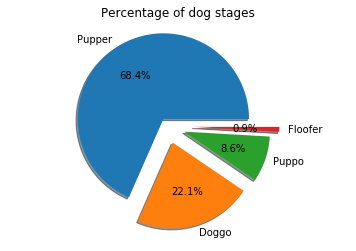

In [68]:
# Creating a pie chart
plt.pie(stage_df,
       labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'],
       autopct = '%1.1f%%', # To show percent on plot. 1.1  formats the percentage to the tenth place. 
       shadow=True,
       explode=(0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage of dog stages')
plt.axis('equal') # By default, matplotlib creates pie charts with a tilt. This line remove this tilt

**Insights**
1. Pupper has the highest percentage.
2. Floofer has the lowest percentage.

#### B. Relationship between retweet count and favorite count

Text(0,0.5,'Favorite Count')

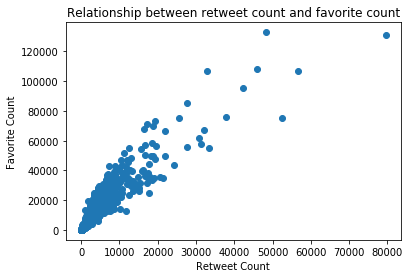

In [69]:
plt.scatter(clean_t_archive.retweet_count, clean_t_archive.favorite_count)
plt.title('Relationship between retweet count and favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

**Insights**
It appears that there is a linear relationship between both parameters.